# 1.Importation des bibliothèques : 

In [28]:
import pandas as pd 
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string
import matplotlib.pyplot as plt


# 2.Chargement des données :

In [2]:
df=pd.read_csv("phrase_disease_data.csv")

In [3]:
df

,prompt,phrase
0,Emotional pain,When I remember her I feel down
1,Hair falling out,When I carry heavy things I feel like breaking...
2,Heart hurts,there is too much pain when i move my arm
3,Infected wound,My son had his lip pierced and it is swollen a...
4,Infected wound,My muscles in my lower back are aching
...,...,...
6645,Stomach ache,I feel a burning sensation in my guts about 2 ...
6646,Open wound,I have a split on my thumb that will not heal.
6647,Joint pain,I feel a lot of pain in the joints.
6648,Heart hurts,The area around my heart doesn't feel good.


In [4]:
df['phrase']

0                         When I remember her I feel down
1       When I carry heavy things I feel like breaking...
2               there is too much pain when i move my arm
3       My son had his lip pierced and it is swollen a...
4                  My muscles in my lower back are aching
                              ...                        
6645    I feel a burning sensation in my guts about 2 ...
6646       I have a split on my thumb that will not heal.
6647                  I feel a lot of pain in the joints.
6648          The area around my heart doesn't feel good.
6649                    I complain alot with skin allergy
Name: phrase, Length: 6650, dtype: object

# 3.Prétraitement des données :  

## 3.1 Supprimer les ponctuation

In [5]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [6]:
def remove_punctuations(text):
    punctuation=string.punctuation
    for char in punctuation:
        text=text.replace(char,'')
    return text

In [7]:
df['clean_phrase']=df['phrase'].apply(lambda x: remove_punctuations(x) )
df['clean_phrase'].head()

0                      When I remember her I feel down
1    When I carry heavy things I feel like breaking...
2            there is too much pain when i move my arm
3    My son had his lip pierced and it is swollen a...
4               My muscles in my lower back are aching
Name: clean_phrase, dtype: object

## 3.2 Tokenization 

In [8]:
def tokenisation(text):
 
    tokens = nltk.word_tokenize(text)
    return tokens

In [9]:
df['tokens_phrase']=df['clean_phrase'].apply(lambda x: tokenisation(x) )
df['tokens_phrase'].head()

0              [When, I, remember, her, I, feel, down]
1    [When, I, carry, heavy, things, I, feel, like,...
2    [there, is, too, much, pain, when, i, move, my...
3    [My, son, had, his, lip, pierced, and, it, is,...
4      [My, muscles, in, my, lower, back, are, aching]
Name: tokens_phrase, dtype: object

## 3.3 Supprimer les stops words 

In [10]:
def removed_stopwords(text):
    A=[word for word in text if word not in stopwords.words('english')]
    return A

In [11]:
df['clean_phrase']=df['tokens_phrase'].apply(lambda x: removed_stopwords(x) )
df['clean_phrase'].head()

0                         [When, I, remember, I, feel]
1    [When, I, carry, heavy, things, I, feel, like,...
2                              [much, pain, move, arm]
3    [My, son, lip, pierced, swollen, skin, inside,...
4                   [My, muscles, lower, back, aching]
Name: clean_phrase, dtype: object

## 3.4 stemming 

In [12]:
ps = PorterStemmer()

In [13]:

def stem_words(text):
    
     stem=[ps.stem(word) for word in text]
    
     return stem

In [14]:
df['stem_words']=df['clean_phrase'].apply(lambda x:stem_words(x) )
df['stem_words'].head()

0                           [when, i, rememb, i, feel]
1    [when, i, carri, heavi, thing, i, feel, like, ...
2                              [much, pain, move, arm]
3    [my, son, lip, pierc, swollen, skin, insid, li...
4                        [my, muscl, lower, back, ach]
Name: stem_words, dtype: object

# 3.5 lemmatisation 

In [15]:
wordnet_lemmatizer = WordNetLemmatizer()
def lem_words(text):
    lem=[wordnet_lemmatizer.lemmatize(w) for w in text]
    return(lem)

In [16]:
df['lemma_words']=df['clean_phrase'].apply(lambda x:lem_words(x) )
df['lemma_words'].head()

0                         [When, I, remember, I, feel]
1    [When, I, carry, heavy, thing, I, feel, like, ...
2                              [much, pain, move, arm]
3    [My, son, lip, pierced, swollen, skin, inside,...
4                    [My, muscle, lower, back, aching]
Name: lemma_words, dtype: object

## le clean text 

In [17]:
def clean_text(text):
 
    
    return " ".join([wordnet_lemmatizer.lemmatize(w) for w  in text])

In [18]:
df['clean_text']=df['lemma_words'].apply(lambda x:clean_text(x) )
df['clean_text'].head()

0                               When I remember I feel
1    When I carry heavy thing I feel like breaking ...
2                                   much pain move arm
3    My son lip pierced swollen skin inside lip gre...
4                          My muscle lower back aching
Name: clean_text, dtype: object

In [19]:
df

,prompt,phrase,clean_phrase,tokens_phrase,stem_words,lemma_words,clean_text
0,Emotional pain,When I remember her I feel down,"[When, I, remember, I, feel]","[When, I, remember, her, I, feel, down]","[when, i, rememb, i, feel]","[When, I, remember, I, feel]",When I remember I feel
1,Hair falling out,When I carry heavy things I feel like breaking...,"[When, I, carry, heavy, things, I, feel, like,...","[When, I, carry, heavy, things, I, feel, like,...","[when, i, carri, heavi, thing, i, feel, like, ...","[When, I, carry, heavy, thing, I, feel, like, ...",When I carry heavy thing I feel like breaking ...
2,Heart hurts,there is too much pain when i move my arm,"[much, pain, move, arm]","[there, is, too, much, pain, when, i, move, my...","[much, pain, move, arm]","[much, pain, move, arm]",much pain move arm
3,Infected wound,My son had his lip pierced and it is swollen a...,"[My, son, lip, pierced, swollen, skin, inside,...","[My, son, had, his, lip, pierced, and, it, is,...","[my, son, lip, pierc, swollen, skin, insid, li...","[My, son, lip, pierced, swollen, skin, inside,...",My son lip pierced swollen skin inside lip gre...
4,Infected wound,My muscles in my lower back are aching,"[My, muscles, lower, back, aching]","[My, muscles, in, my, lower, back, are, aching]","[my, muscl, lower, back, ach]","[My, muscle, lower, back, aching]",My muscle lower back aching
...,...,...,...,...,...,...,...
6645,Stomach ache,I feel a burning sensation in my guts about 2 ...,"[I, feel, burning, sensation, guts, 2, hours, ...","[I, feel, a, burning, sensation, in, my, guts,...","[i, feel, burn, sensat, gut, 2, hour, meal]","[I, feel, burning, sensation, gut, 2, hour, meal]",I feel burning sensation gut 2 hour meal
6646,Open wound,I have a split on my thumb that will not heal.,"[I, split, thumb, heal]","[I, have, a, split, on, my, thumb, that, will,...","[i, split, thumb, heal]","[I, split, thumb, heal]",I split thumb heal
6647,Joint pain,I feel a lot of pain in the joints.,"[I, feel, lot, pain, joints]","[I, feel, a, lot, of, pain, in, the, joints]","[i, feel, lot, pain, joint]","[I, feel, lot, pain, joint]",I feel lot pain joint
6648,Heart hurts,The area around my heart doesn't feel good.,"[The, area, around, heart, doesnt, feel, good]","[The, area, around, my, heart, doesnt, feel, g...","[the, area, around, heart, doesnt, feel, good]","[The, area, around, heart, doesnt, feel, good]",The area around heart doesnt feel good


# 4.Représentation des données : 

## la représentation TF-IDF

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
vect = TfidfVectorizer()

In [22]:
X = df['phrase'] 
y = df['prompt'] 

In [23]:
X = vect.fit_transform(X)

In [24]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
counts = df['prompt'].value_counts()

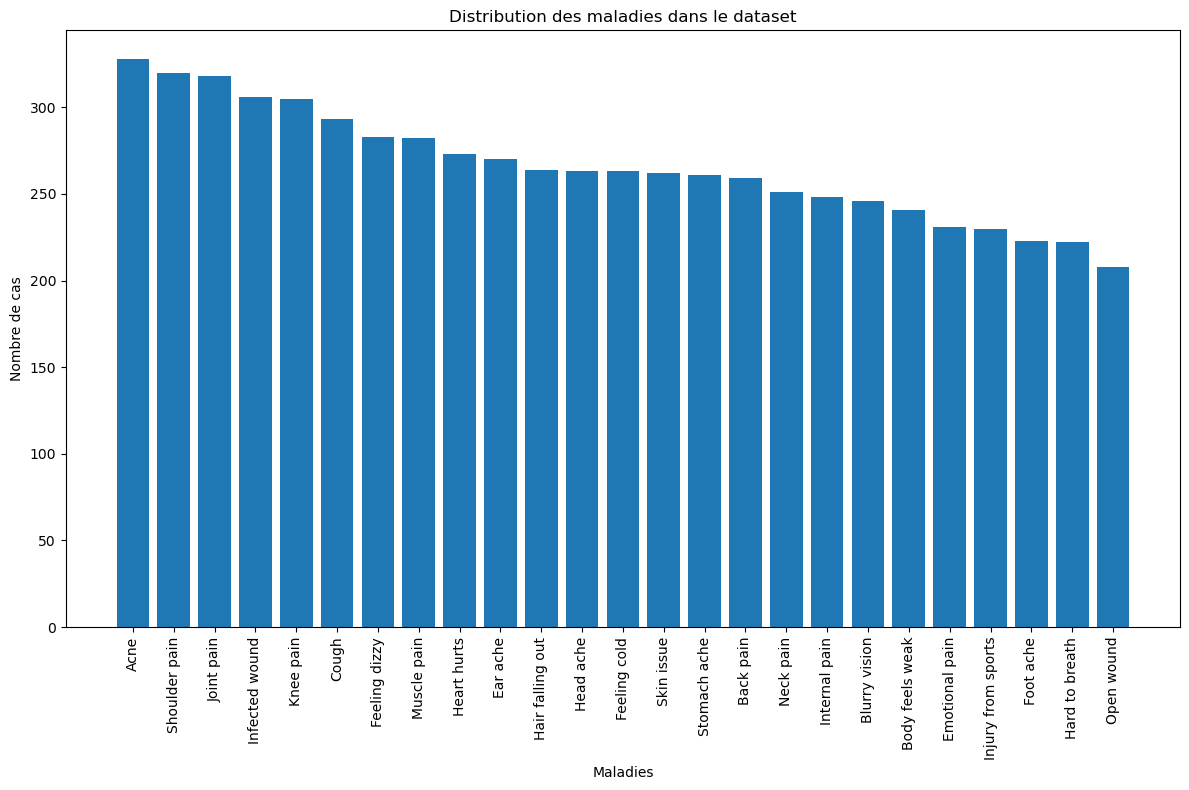

In [36]:
fig = plt.figure(figsize=(12, 8))
plt.bar(counts.index, counts.values)
plt.xlabel('Maladies')
plt.ylabel('Nombre de cas')
plt.title('Distribution des maladies dans le dataset')

plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

# 5.Division des données :

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6.Construction du modèle :

### SVM

In [24]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C = 1)
model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [25]:
y_pred = model.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)


Accuracy: 0.9947368421052631


## Naive Bayes

In [27]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [28]:
y_pred = nb_model.predict(X_test)


In [29]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)


Accuracy: 0.98796992481203


# 8.Prédiction :

In [30]:
new_phrase = "  my throat is pain "

In [31]:
new_phrase_tfidf = vect.transform([new_phrase])

In [32]:
 model.predict(new_phrase_tfidf)

array(['Cough'], dtype=object)

In [33]:
nb_model.predict(new_phrase_tfidf)

array(['Cough'], dtype='<U18')

# 9.Enregister le model et le vectoriseur

In [34]:
import joblib

In [35]:
joblib.dump(model, 'modele.pkl')

['modele.pkl']

In [36]:
joblib.dump(vect, 'vectoriseur.pkl')

['vectoriseur.pkl']